### As an analyst for a bank looking to grow its market share. The amount of customers using banking services has decreased recently, and the bank is concerned that some of its current customer may no longer use them as their primary bank. One of your responsibilities as a data analyst is to identify the causes of client attrition based on the data. The data scientist wants to better understand current customer behavior and maybe wants to forecast future customer attrition by feature selection and classification models, thus they are interested in your findings on the data.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the format in data to two decimal places 
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
customers_data = pd.read_csv('data/Churn_Customers.csv')
customers_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.00,2,0.00,1,1,1,"101,348.88",1
1,15647311,608,Spain,Female,41.00,1,"83,807.86",1,0,1,"112,542.58",0
2,15619304,502,France,Female,42.00,8,"159,660.80",3,1,0,"113,931.57",1
3,15701354,699,France,Female,39.00,1,0.00,2,0,0,"93,826.63",0
4,15737888,850,Spain,Female,43.00,2,"125,510.82",1,1,1,"79,084.10",0


In [4]:
# Checking for number of rows and columns shape and data types
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [4]:
# Checking for the numbe of null values in a column
customers_data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [12]:
# Getting the statistical description of the column
customers_data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,"10,000.00","10,000.00","9,994.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","9,996.00","10,000.00"
mean,"15,690,940.57",650.53,38.93,5.01,"76,485.89",1.53,0.71,0.52,"100,074.74",0.20
std,"71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,515.77",0.40
min,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"15,628,528.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"50,974.08",0.00
50%,"15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,168.24",0.00
75%,"15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


In [4]:
# Impute the missing values in EstimatedSalary, since the column is continuous  filling in the missing values with the mean of the data in that column

mean_salary = customers_data['EstimatedSalary'].mean()

customers_data['EstimatedSalary'] = customers_data['EstimatedSalary'].fillna(mean_salary)

In [16]:
customers_data['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [5]:
# From the above it has been obsevred that more males(5453) when compared to females(4543). 
# As a rule of thumb, you fill the missing values with the more frequently occurring entry,which in this case is Male

customers_data['Gender'] = customers_data['Gender'].fillna(customers_data['Gender'].value_counts().idxmax())

In [7]:
# For Age, replace the missing values with the mode of the values in the column
customers_data['Age'].mode()[0]

37.0

In [6]:
mode_value = customers_data['Age'].mode()[0]
customers_data['Age'] = customers_data.Age.fillna(mode_value)

In [7]:
# Check if there are any null values

customers_data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Renaming the columns

customers_data = customers_data.rename(columns = {'CredRate' : 'Credit Score', 'ActMem' : 'IsanActiveMember', 'Prod Number' : 'Number of Products',
                                                  'Exited' : 'Churn'})

In [9]:
# Checking whether the columns has been renamed
customers_data.columns

Index(['CustomerId', 'Credit Score', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Number of Products', 'HasCrCard', 'IsanActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [10]:
# Removing the customerId column as it does not provide any useful information and moving the churn column to the right 
customers_data.drop(labels=['CustomerId'], axis=1,inplace = True)
column_churn = customers_data['Churn']
customers_data.drop(labels=['Churn'], axis=1,inplace = True)
customers_data.insert(len(customers_data.columns), 'Churn', column_churn.values)

In [22]:
customers_data.columns

Index(['Credit Score', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'Number of Products', 'HasCrCard', 'IsanActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [11]:
# Changing the data type of the Geography, Gender, HasCrCard, Churn, and IsActiveMember columns to categorical variables

customers_data['Geography'] = customers_data['Geography'].astype('category')
customers_data['Gender'] = customers_data['Gender'].astype('category')
customers_data['HasCrCard'] = customers_data['HasCrCard'].astype('category')
customers_data['Churn'] = customers_data['Churn'].astype('category')
customers_data['IsanActiveMember'] = customers_data['IsanActiveMember'].astype('category')

In [29]:
customers_data.dtypes

Credit Score             int64
Geography             category
Gender                category
Age                    float64
Tenure                   int64
Balance                float64
Number of Products       int64
HasCrCard             category
IsanActiveMember      category
EstimatedSalary        float64
Churn                 category
dtype: object

In [12]:
# The churn column has two attributes: 0 indicates that the customer did not churn and 1 implies that the customer churned
# Finding the percentages of Customers who have churned and not churned

customers_data['Churn'].value_counts(1) * 100

0   79.63
1   20.37
Name: Churn, dtype: float64

##### This gave us an output of 79.63 and 20.37 percent corresponding to the customers that did not churn and those that churned, respectively.

In [13]:
# Percentage of customers that have a credit card

customers_data['HasCrCard'].value_counts(1) * 100

1   70.55
0   29.45
Name: HasCrCard, dtype: float64

In [14]:
# Inspect the mean attributes of customers who churned compared to those who did not churn

summary_data = customers_data.groupby('Churn')
summary_data.mean(numeric_only=True)

,Credit Score,Age,Tenure,Balance,Number of Products,EstimatedSalary
Churn,,,,,,
0,651.85,37.41,5.03,"72,745.30",1.54,"99,718.93"
1,645.35,44.84,4.93,"91,108.54",1.48,"101,465.68"


In [15]:
summary_data.median(numeric_only=True)

,Credit Score,Age,Tenure,Balance,Number of Products,EstimatedSalary
Churn,,,,,,
0,653,36.00,5,"92,072.68",2,"99,645.04"
1,646,45.00,5,"109,349.29",1,"102,460.84"


In [16]:
# Setting the format in data to four decimal places 
pd.options.display.float_format = '{:,.4f}'.format

,Credit Score,Age,Tenure,Balance,Number of Products,EstimatedSalary
Credit Score,1.0000,-0.0042,0.0008,0.0063,0.0122,-0.0014
Age,-0.0042,1.0000,-0.0100,0.0281,-0.0306,-0.0072
Tenure,0.0008,-0.0100,1.0000,-0.0123,0.0134,0.0074
Balance,0.0063,0.0281,-0.0123,1.0000,-0.3042,0.0131
Number of Products,0.0122,-0.0306,0.0134,-0.3042,1.0000,0.0141
EstimatedSalary,-0.0014,-0.0072,0.0074,0.0131,0.0141,1.0000


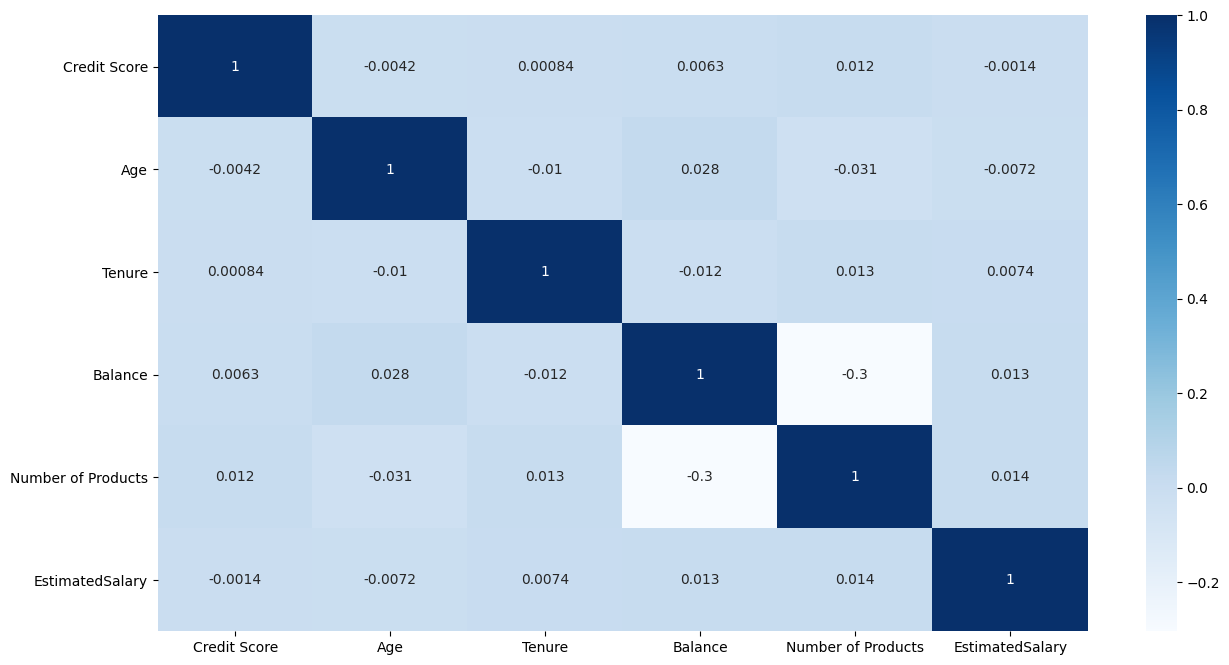

In [17]:
corr = customers_data.corr()
plt.figure(figsize = (15, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap='Blues')
corr

##### NumOfProducts and Balance have a negative correlation of –0.304, whereas Balance and Age have a positive correlation of 0.028. A change in NumOfProducts will have a stronger effect on Balance than it will on Age

#### Plot the distribution graph of the customers for the EstimatedSalary, Age, and Balance variables

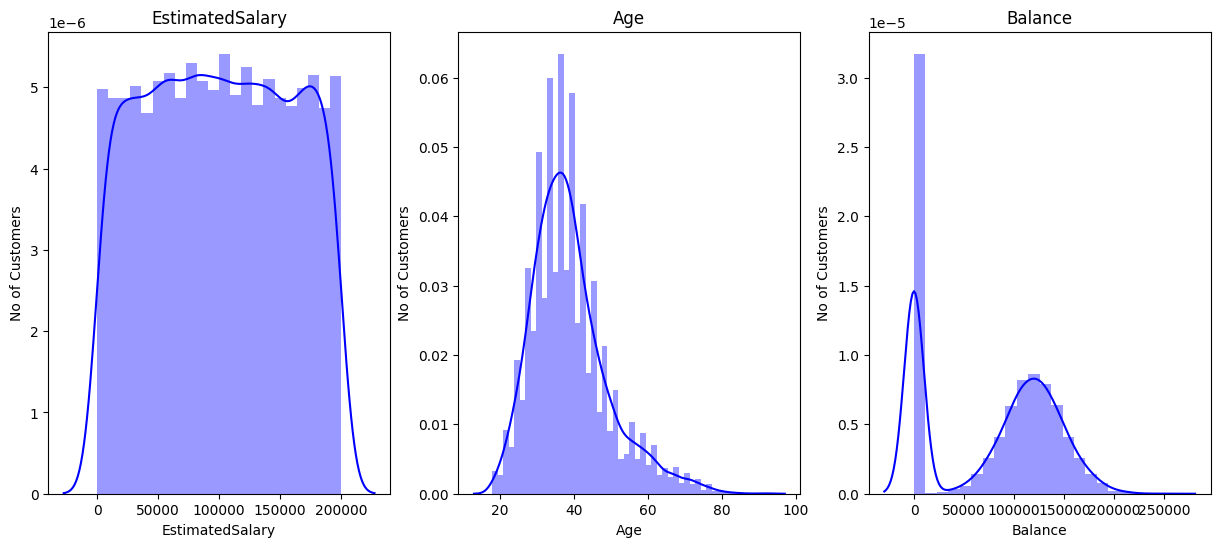

In [20]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(customers_data.EstimatedSalary, kde=True, color="blue", ax=axes[0]).set_title('EstimatedSalary'), axes[0].set_ylabel('No of Customers')
sns.distplot(customers_data.Age, kde=True, color="blue", ax=axes[1]).set_title('Age'), axes[1].set_ylabel('No of Customers')
sns.distplot(customers_data.Balance, kde=True, color="blue", ax=axes[2]).set_title('Balance'), axes[2].set_ylabel('No of Customers');

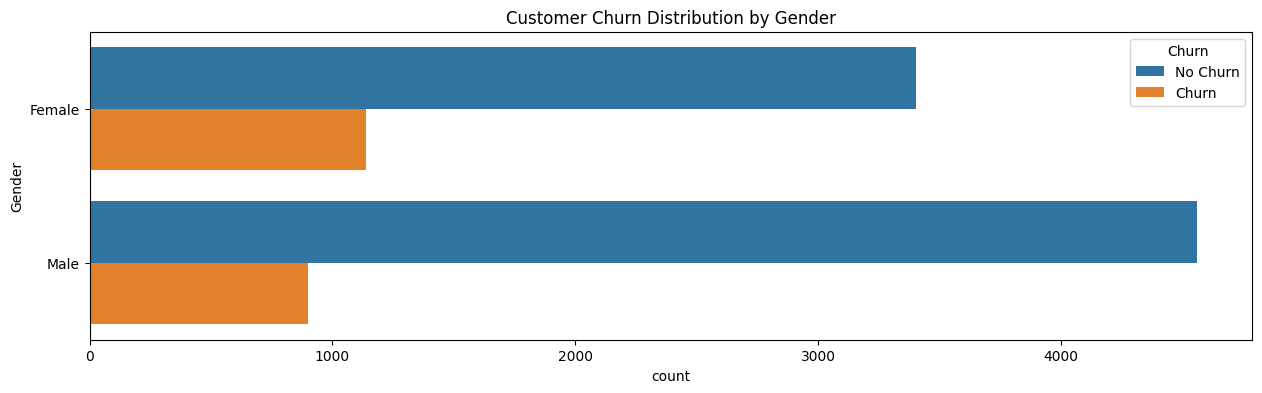

In [30]:
# Check whether there is a difference in churn for Gender using bivariate analysis
plt.figure(figsize=(15,4))
p=sns.countplot(y=customers_data['Gender'], hue = 'Churn', data=customers_data)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender');

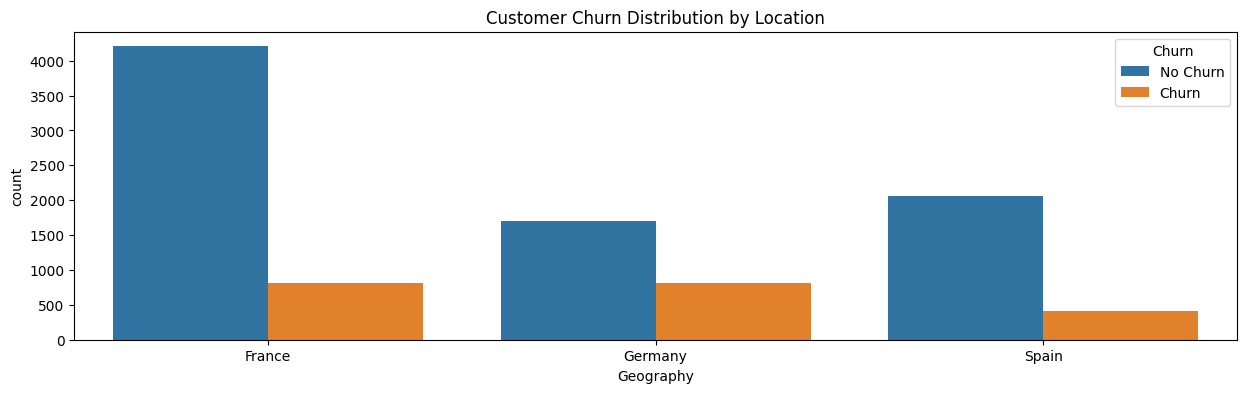

In [32]:
# Check whether there is a difference in churn for Geograohy using bivariate analysis
plt.figure(figsize=(15,4))
p=sns.countplot(x=customers_data['Geography'], hue = 'Churn', data=customers_data)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Location');

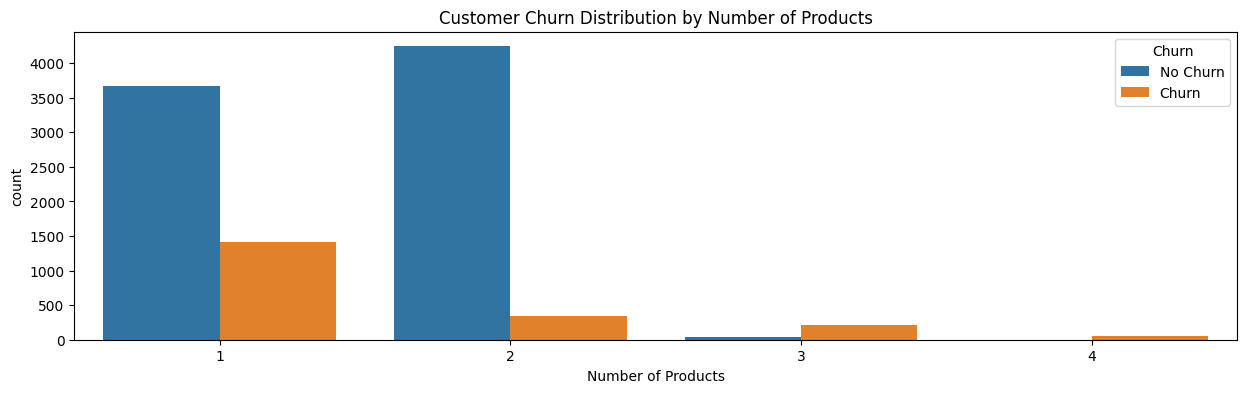

In [33]:
# Check whether there is a difference in churn for NumofProducts using bivariate analysis
plt.figure(figsize=(15,4))
p=sns.countplot(x=customers_data['Number of Products'], hue = 'Churn', data=customers_data)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Number of Products');

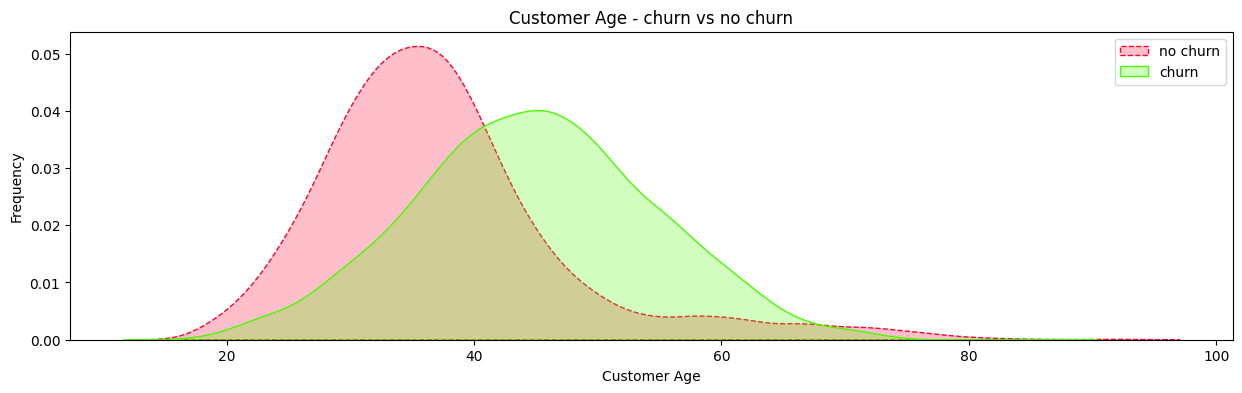

In [39]:
# Inspect churn versus Age
plt.figure(figsize=(15,4))
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 0),'Age'] , color=sns.color_palette("prism_r")[0], shade=True,label='no churn', linestyle='--')
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 1),'Age'] , color=sns.color_palette("prism_r")[1], shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')
plt.legend();

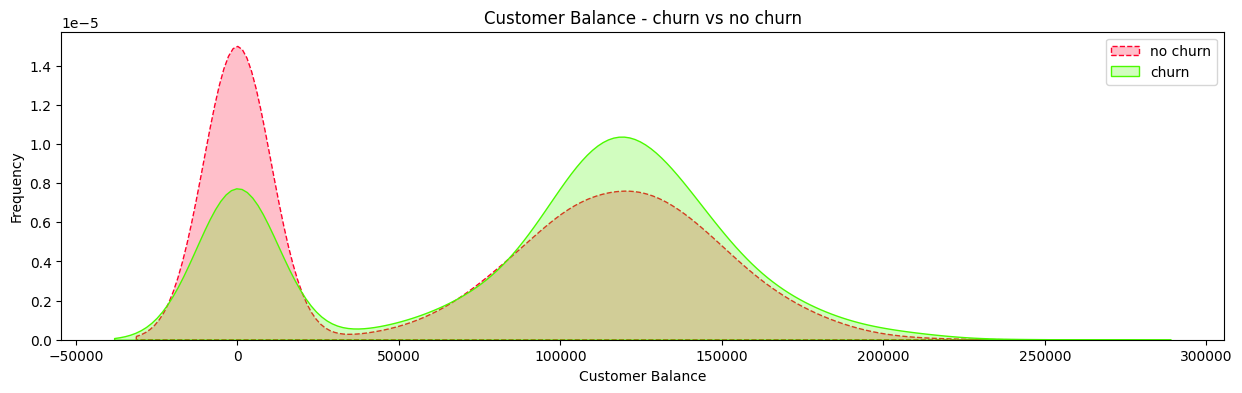

In [41]:
#Inspect balance versus churn
plt.figure(figsize=(15,4))
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 0),'Balance'] , color=sns.color_palette("prism_r")[0], shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 1),'Balance'] , color=sns.color_palette("prism_r")[1], shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')
plt.legend();

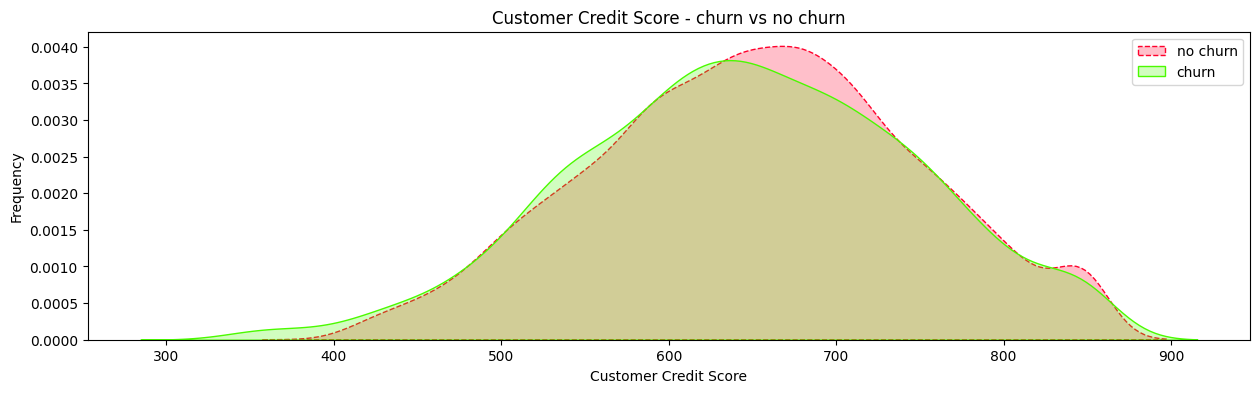

In [43]:
#Inspect CreditScore versus churn
plt.figure(figsize=(15,4))
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 0),'Credit Score'] , color=sns.color_palette("prism_r")[0], shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(customers_data.loc[(customers_data['Churn'] == 1),'Credit Score'] , color=sns.color_palette("prism_r")[1], shade=True, label='churn')
ax.set(xlabel='Customer Credit Score', ylabel='Frequency')
plt.title('Customer Credit Score - churn vs no churn')
plt.legend();

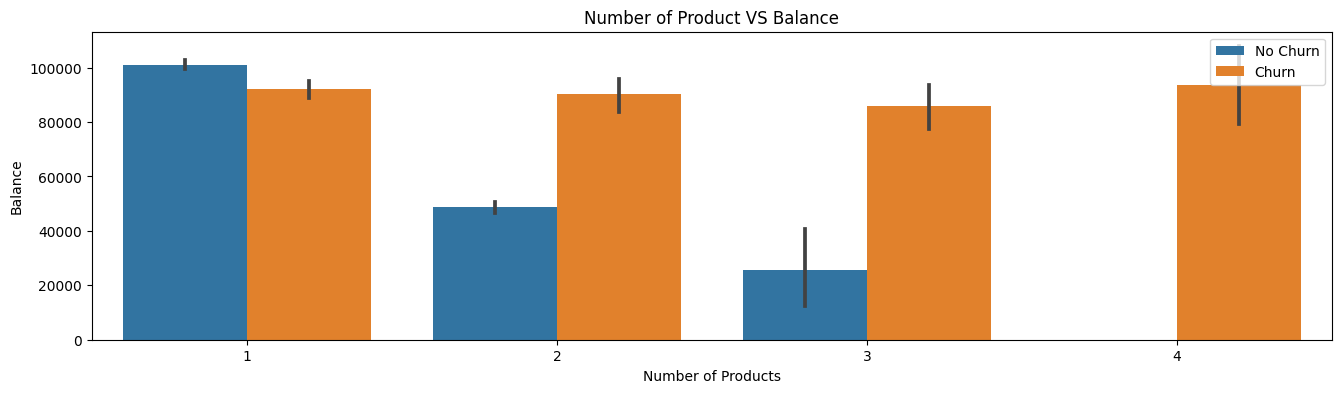

In [46]:
plt.figure(figsize=(16,4))
p=sns.barplot(x='Number of Products',y='Balance',hue='Churn', data=customers_data)
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Number of Product VS Balance');